Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE`/`raise NotImplementedError` or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Relational Database Project

## Author: Yanni Guo

In [1]:
from IPython.display import Image

# I. Introduction:

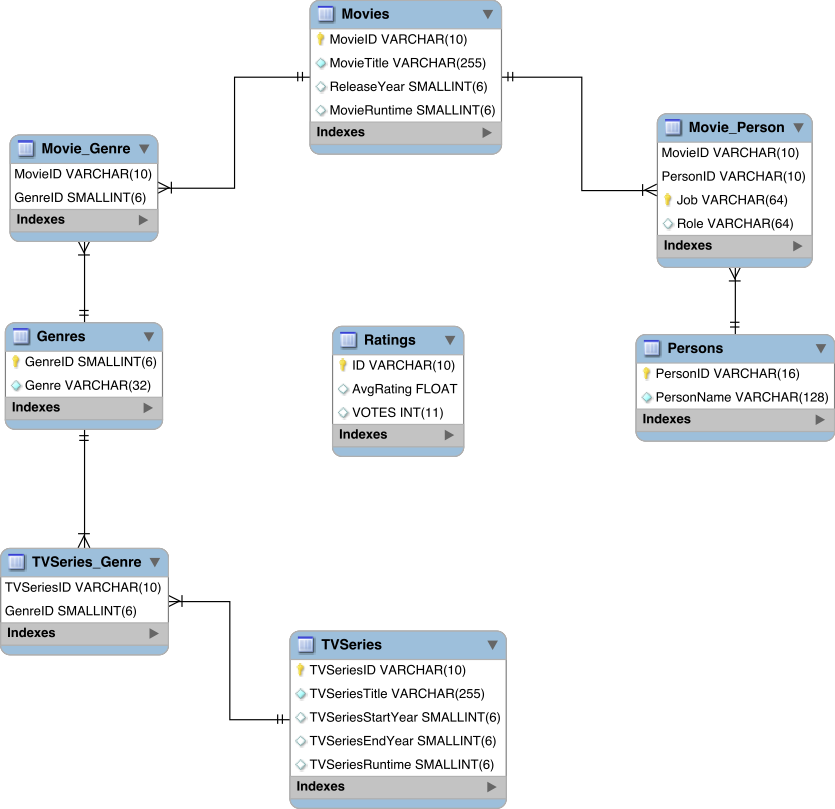

In [4]:
Image("figures/imdb3.png",width="400")

The database I used for this project comes from the imdb3: Movie/ TV series database, which is collected by IMDb for the open public to use. IMDb is an online database that contains information related films, television shows, videos, video games, and streaming online content. The imdb3 database that I used contains eight dataset tables, but I chose to explore six of the tables: Ratings, Movie_Person, Movies, Movie_Genre, and Genres. After exploring the tables, I developed three questions that I am interested in answering, which are related to movie genres, movie runtime, movie rating, movie release year, and casting jobs for movies. I used SQL language and python to work with the imdb3 relational database.

The imdb3 database contains information about movies and tv shows from 1970 to 2019. As shown in the relational model of the imdb3 databases, each table has a specific design, attributes, and relationships with other tables. It is important to understand the relational model structure so that it provides a respiratory of data that is persistent, organized, has rapid search and retrieval, consistency, constraints, sharing abilities, has a good foundation, and can focus on multiple tables. By having a sound database system, you can use SQL query operations to correctly query the tables in the relational model to fulfill the client’s requests. 

In the relational database model of the imdb3 database, each interdependent table has a structure composed of rows and columns. In a relational model, the columns of a table are called fields, and the rows are called records. Furthermore, each table has a functional dependency that separates one table from another and is the logical mapping from the independent variables to the dependent variables. Another important component is the key of a table which is a field(s) that can be used to uniquely identify the records of a table. The independent variables of the left-side of functional dependencies would establish the potential keys. Lastly, in every table of a relational database, there must be a primary key (one of the potential keys) to uniquely determine the records of the table.

In the tables of the imdb3 database, which I focused on, the `Ratings` table has fields for the average ratings of movies and tv shows, and the number of votes each rating had. The primary key of the `Ratings` table is `ID`. The `Movie_Person` table has fields for `MovieID`, `PersonID`, `Job`, and `Role`. The primary key for the table is the `Job` field. The `Movies` table has fields for `MovieID`, `MovieTitle`, `ReleaseYear`, and `MovieRunTime`. The primary key for the table is the `MovieID` field. The `Movie_Genre` table has fields for `MovieID`, and `GenreID`. Lastly, the `Genres` table has fields for `GenreID` and `Genre`. The primary key for the `Genres` table is the `Genre` field.

Furthermore, the tables have relationships with one another, in order to allow the field from one table to correspond to the field of another table. There are three types of relationships: a many-to-one relationship, a one-to-many relationship, and a many-to-many relationship. The many-to-one relationship is when given a record for a field, there are potentially multiple records from another table that correspond to the given record and vice versa. In addition, a foreign key would exist in the “many” side table of a relationship that allows logical mapping to the primary key of the table on the “one” side. A many-to-many relationship is when given multiple fields from one table, there are multiple fields that correspond to the other table.

In the tables I am using to answer my questions, the `Ratings` table links to the `Movies` table. The `ID` field in the `Ratings` table is not the foreign key, because the `ID` field corresponds to the `MovieID` field from the `Movies` table and the `TVSeriesID` field in the `TVSeries` table. In the `Movie_Person` table, the primary key is the `Job` field and its foreign key `MovieID` links to the primary key in the `Movies` table. In the `Movies` table and the `Movie_Genre` table, there is a one-to-many relationship. The foreign key `MovieID` from the `Movie_Genre` table links to the primary key of the `Movies` table. Lastly, the `Movie_Genre` and `Genres` table have a many-to-one relationship. The foreign key `GenreID` links to the primary key of the `Genres` table.

The first question I am interested in answering is: How does the average rate of movie genres differ depending on the decade? This question requires the combination of the`Ratings` table and the `Movies` table, in order to have the fields for `ReleaseYear`, `Genre`, and `AvgRating` to form one data frame. My second question is what is the relationship between the movie runtime and genre vs. the average movie rating? The second question requires the combination of the `Ratings` table, the `Movies` table, the `Movie_Genre` table, and the `Genres` table to create one joined data frame. Lastly, my third question is how do the number of actors and actresses compare depending on the movie genre? The third question requires the combination of the `Movie_Person` table, the `Movies` table, the `Movie_Genre` table, and the `Genres` table to create a joined data frame. 


# II. Development:

For this project, I used an SQLite database system to connect to the imdb3 database.  For this interaction, I imported the sqlalchemy package to access the generic database library. In order to connect to the database, I built a connection string with the following information: protocol scheme and resource path. After the connection string is created, I establish the connection by building an engine object and a connection object. Then I loaded the notebook extension to use “SQL Magic” to create SQL queries and established the connection from a client to the server.

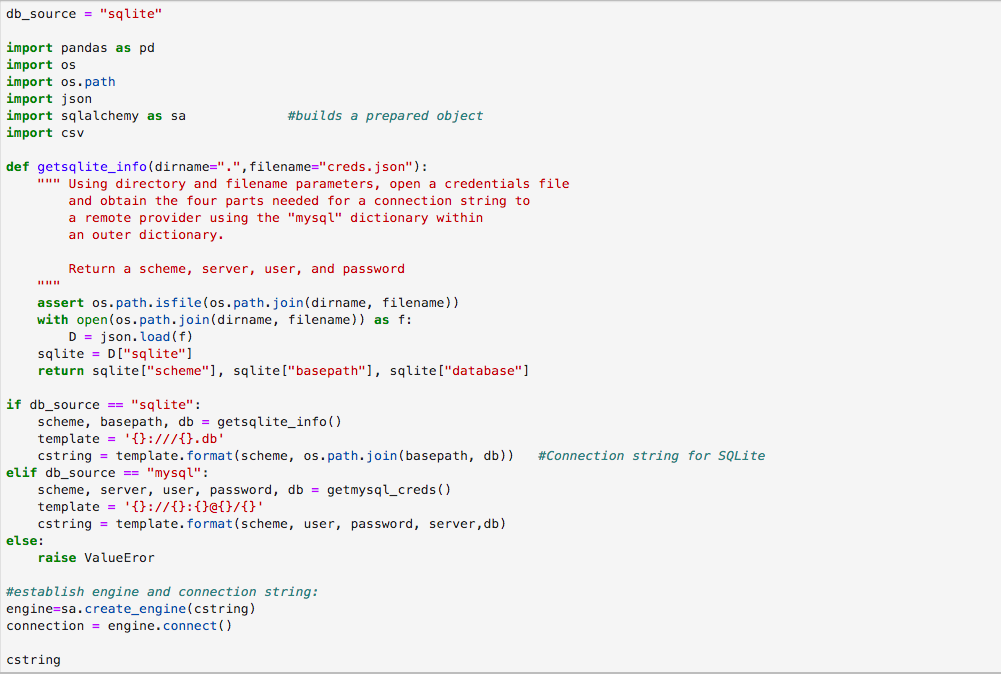

In [27]:
Image("figures/development1.png", width="600")

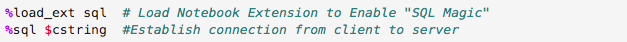

In [28]:
Image("figures/development2.png", width="600")

# III. Questions and Visualizations:

# A. Question 1: How does the average rate of movie genres differ depending on the decade?

The first question that I was interested in was what was the average rating for each movie genre for each decade? I chose this question because I was interested in analyzing how the popularity of movie genres changes over time. There have been studies that analyzed the psychology of people in each generation in relation to audience expectations and experience for movies. 

The first step to answer my question is to create a query that computes the maximum, minimum, and average value of votes for each movie rating. I wanted to compute these values in order to limit bias within my answer. For example, a certain movie for a movie genre has a higher average rating because it had more votes. Other movies for a genre may have had a lower rating because it received a lower number of votes. Thus, it would be best to see the range of values of votes to set up a threshold for a minimum number and a maximum number of votes to hold fair judgment of the data. 

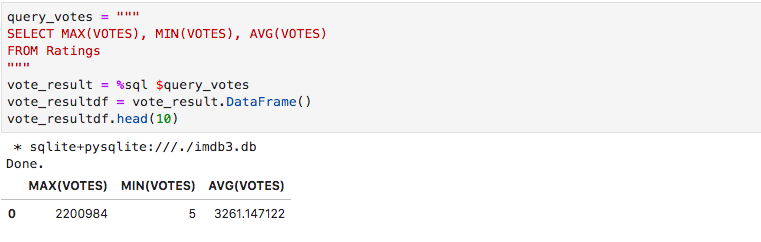

In [29]:
Image("figures/p2_s1.png", width="600")

After evaluating the threshold for the number of votes, I created a function that makes a query to answer my first question. In query_q1, I selected the fields `ReleaseYear` from the `Movies` table, `Genre` from the `Genres` table, and `AverageRating` from the `Ratings` table. I used the AVG aggregation of the `AverageRating` field to compute the average value of the rating for all genres for a specific year. 

In order to join all three tables together, I first combined the `Ratings` table and `Movies` table with left join on `ID` and `MovieID`, because the fields correspond with one another. The reason I used left join is that I need to use all the fields in the left table `Ratings` table, and only the `MovieID` and `ReleaseYear` from the `Movies` table (right table). Then, in order to obtain the `Genre` field from the `Genres` table, I had to combine the tables using the linking table `Movie_Genre` since the `Movies` table and the `Genres` table has a many-to-many relationship. The `Movies` table has a one-to-many relationship, so I combined the tables with left join and used the `MovieID` field as the matching condition. I can use the “USING” method instead of the “ON” method because the fields are present in both tables, and the join is based on equality of the specified common-fields. Finally, the `Movie_Genre` table has a many-to-one relationship with the `Genres` table, so I combined the tables with left join using the `GenreID` field as the matching condition.


 Following the joining of tables are the filter and aggregation operations. I used the WHERE clause to filter the rows of the result table. For my specific question, I only want to see data for each decade, thus the values of the `ReleaseYear` field must only be equal to 1970, 1980, 1990, 2000, and 2010. I also set a threshold for the votes, and decided on a range of votes between 261 and 2621, from my judgment on the previous query. Thus, only movies with ratings that had votes between the thresholds will be included in the results. I used the GROUP BY method which is applied to the aggregation function on the `AvgRating` field. The average computation of the `AvgRating` field is partitioned by genre and then by the movie release year. This way, the result is the calculated average of all the average ratings of a genre for a specific year. Lastly, I used the ORDER method to specify the order of the values of the rows in descending order. In the resulting table, you will see that every year, all the genres are listed with their corresponding average rating.

 After the query is created, I incorporate variable values to the function with SQL variable binding in order to have functional abstraction. Variable binding is the best option because they are reusable and carry more type information. The first step for binding is to prepare a statement object that has a variable that indicates the location where the values of variables should be substituted.  In this case, the variable is “query_q1” which is the created query. The binding of variables is indicated with a colon “:'' immediately followed by the name of the variable that corresponds to a parameter. The second step was to create a bound statement, which is a binding operation that uses the bindparams() method of the prepared statement. The bindparams() uses the named parameters as the argument. In this function, the named parameters are y1, y2, y3, y4, y5, v_min, and v_max. Lastly is the execution step, which is the read_sql_query() function that uses the bound statement. The read_sql_query() function combines the actions of the execute() method and the fetchall() method to obtain the results and returns a data frame. The end result is a pandas data frame with fields for movie release year, genre, and the computed average of average movie rating. The functional dependency of this table is: Release Year, Genre -> average_rating.


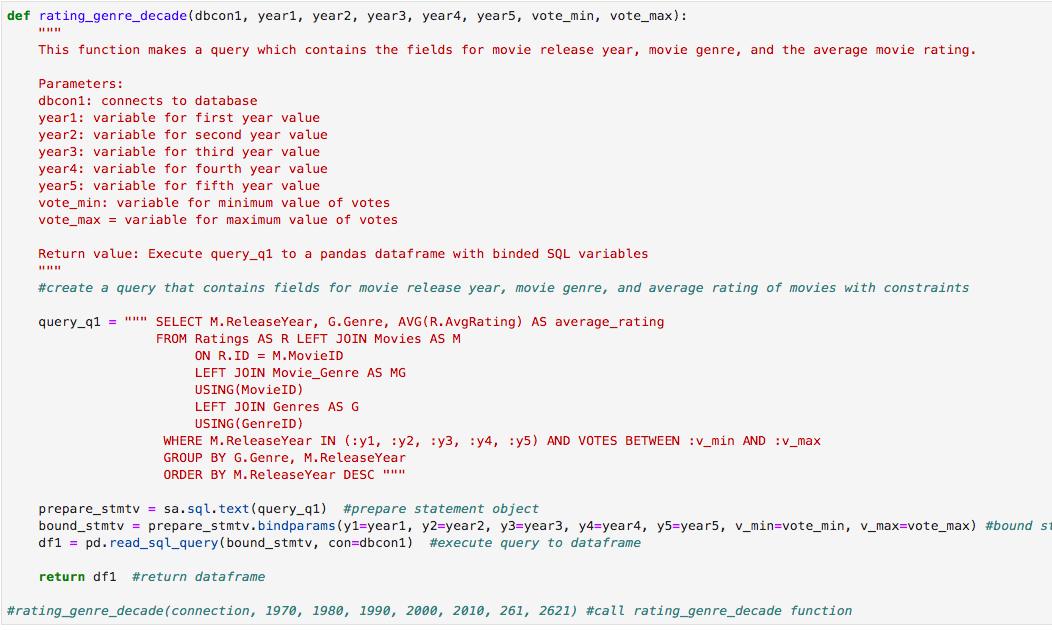

In [30]:
Image("figures/p2_s2.png", width="600")

This table will answer my question because I will be able to translate the data to a key visual to compare the categorical variables.

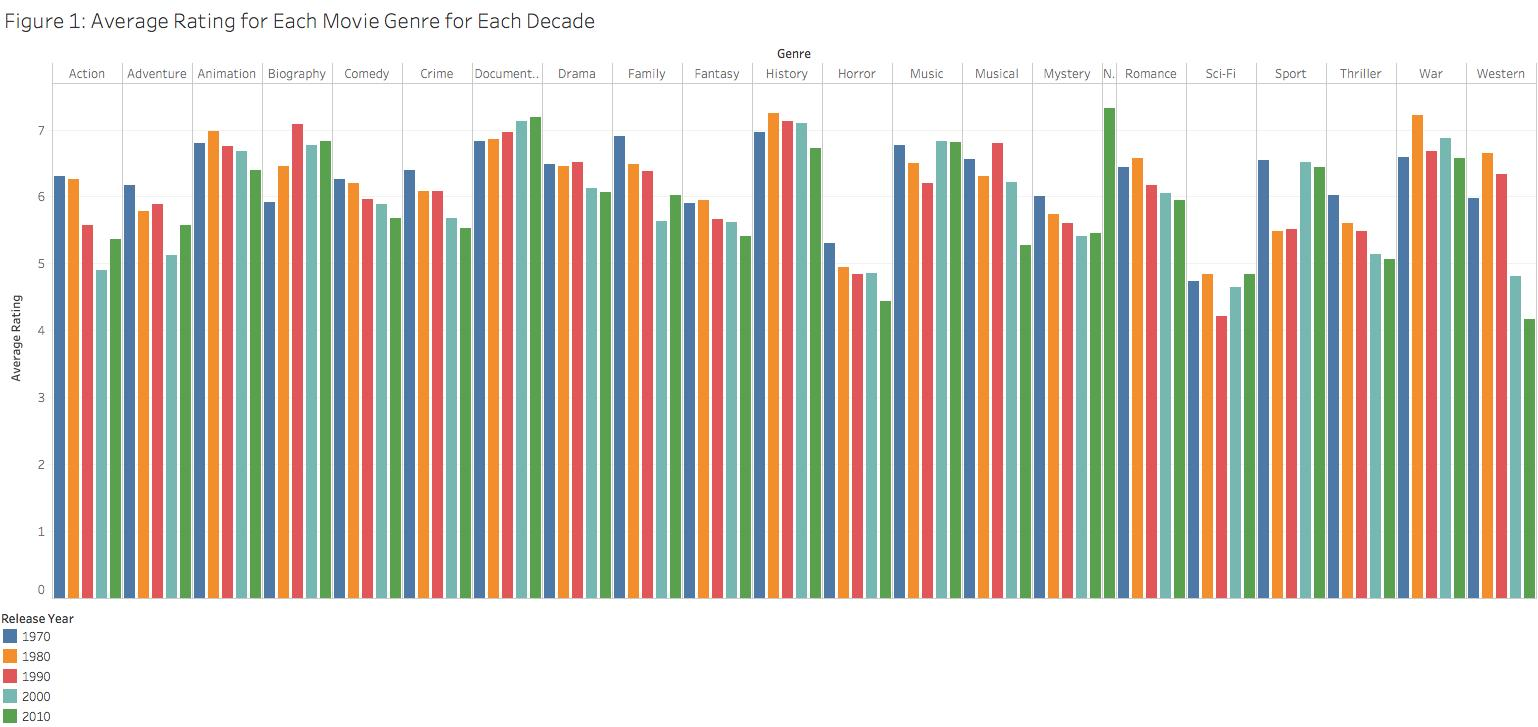

In [10]:
Image("figures/Question1_figure_final.jpg", height="900", width="1000")

In Figure 1, I created a grouped bar graph that compares the computed average rate of movies for each genre for each decade. For each movie genre, there are five color-coded bars, each bar represents a different year. The blue bar is the year 1970, the yellow bar is the year 1980, the red bar is 1990, the light blue bar is the year 2000, and the green bar is the year 2010. The y-axis values of the bars are the overall computed average of the average rating for all the movie genres for each year. The bar graph allows the comparison of movie ratings between each genre, and the comparison of movie ratings between each decade within a genre. From an overall view of the figure, the Documentary and History genre movies had the overall highest average rating for all five decades in comparison to the other genres. The Horror and Sci-fi genre movies had the overall lowest average rating for all five decades. The movie genres that had a continuous decrease in average ratings after every decade are: action, adventure, animation, comedy, crime, drama, family, fantasy, horror, musical, mystery, romance, thriller, and western. The movie genres that had a continuous increase in average ratings after every decade are: biography and documentary. The movie genres that had relatively consistent average ratings after every decade are history, music, sci-fi, sport, and war.

An explanation of the average ratings for each movie at a specific year can be related to film production, the film industry,  audience expectations, and the changes in society for each decade. Technological advancements in the film industry were established as years passed, which allowed people to have better film production and editing tools. The new technologies brought new techniques that could have marketed certain genres, such as biography movies and documentaries. Another reason is due to the change in audience expectations. The codes and conventions of movie genres change as time passes, and if they do not meet the audience’s expectations for a genre of a film, there is a more likely chance that the audience will not give a good rating. Moreover, each generation of film watchers has different standards and interests in different movie genres. Contemporary audiences and audiences of older generations have contrasting expectations and tastes. Specific genres may be more appealing to younger viewers but not to older viewers. And younger viewers may have more sophisticated perspectives towards the codes and conventions in films than the elder viewers. Lastly, changes in society, ideologies, values, and representation of society occurs as time passes. The media usually captures the ideologies and events of its time period and reflect the audience’s emotions, values, and concerns of the society around them. And what the media captures and presents is adapted to its own time period. For example, issues and events such as climate change, international conflicts, war, and violence influence the trends of media, are produced as certain genres and draw viewers to those films. Thus, each time period has its own issues, values, a social representation which is usually represented in certain film genres that attract viewers. All of these reasons may help explain why certain movie genres continue to have higher or lower average ratings as years pass. However, more evidence is needed to support these hypotheses.


# B. Question 2: What is the relationship between movie runtime and genre vs. average movie rating?

The second question I was interested in is what was the relationship between the average rating and genre of movies vs. the length of the movie? I was interested in analyzing whether audiences preferred movies with longer runtime or shorter runtime. 

The first step was to create a query that computes the maximum, minimum, and average values of movie runtime. I  wanted to compute these values in order to see the range of values and to examine if there are any outliers.

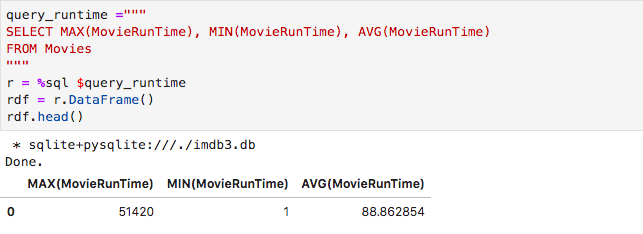

In [31]:
Image("figures/p2_s3.png", width="600")

The second step was to create a function that makes a query, which includes fields for the average movie rating, movie genre, and movie release time were selected. In query_q2, I selected the fields `AvgRating` from the `Ratings` table, `Genre` from the `Genres` table, and `MovieRunTime` from the `Movies` table. Then I combined the three tables in order to obtain all three fields in one data frame. To combine the tables, first, I combined the `Ratings` table with the `Movies` table with left join on `ID` and `MovieID` as the corresponding field. Then I combined the `Movies` table and the `Movie_Genre` table with the left join using the `MovieID` field. Lastly, I combined the `Movie_Genre` table with the `Genres` table using the `GenreID` field. 


After joining all the tables together, I filtered the results of the data frame with the WHERE clause. For my question, I set up a range for movie run time values to eliminate outliers and a range for the number of votes to avoid bias in the rating value. Lastly, I used the ORDER method to list the values by the average movie rate field in ascending order to have an organized table.


After the query is created, I incorporate the variable values to the function with SQL variable binding. I  created a statement object to indicate that the variables to be bound are located in query_q2. Second, I created a bound statement with bindparams(). The parameters in this function are tmin, tmax, vmin2, and vmax2. Lastly, I executed the query to obtain the resulting panda data frame. The functional dependency for this table is: 

`AvgRating`, `Genres` -> `MovieRunTime`. This data frame allowed me to create a visualization to represent the relationship between the variables.


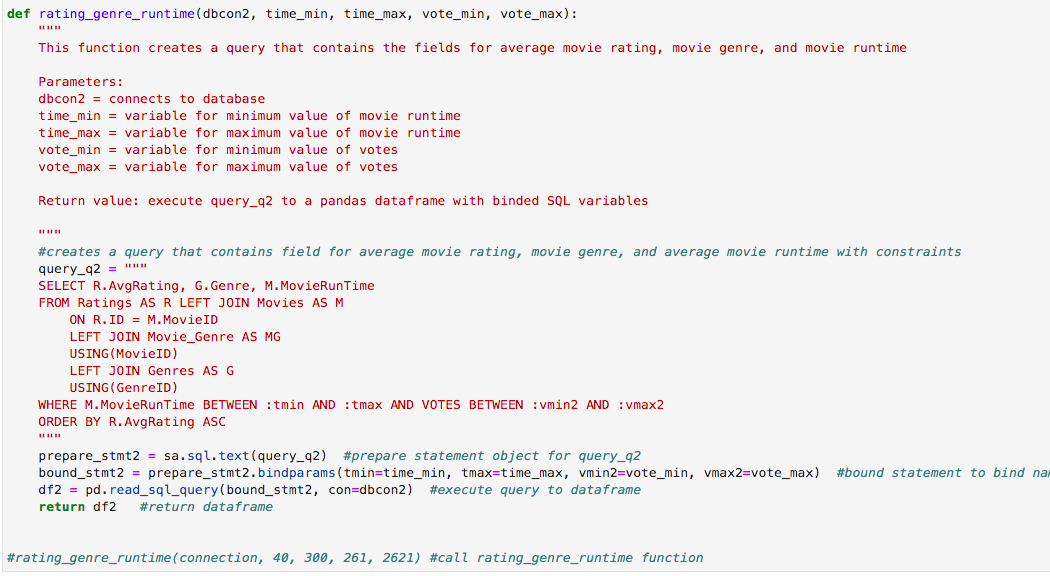

In [32]:
Image("figures/p2_s4.png", width="600")

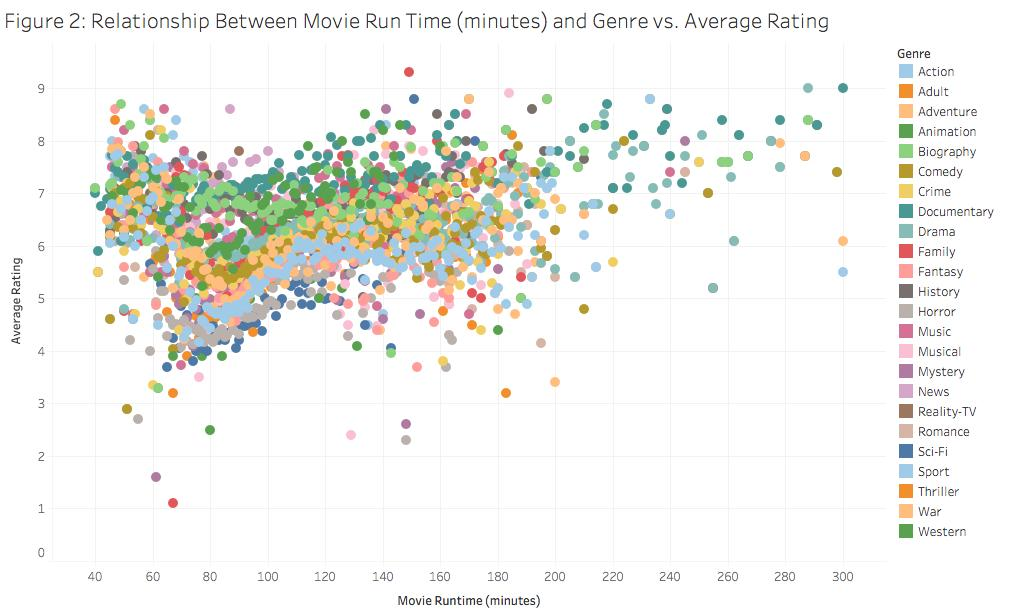

In [13]:
Image("figures/Question2_figure2.jpg", width="1000")

In Figure 2, I created a scatter plot to determine the relationship between movie runtime (in minutes) vs. the average movie rating depending on the genre of the movie. The scatter plot showed a weak and positive correlation between the movie runtime and the average movie runtime. As the movie runtime increased, all the average ratings for each type of genre increased as well. Furthermore, there seems to be more variation in the data points when the movie runtime was at the lowest value and at the highest value. When the runtime was between 40 minutes to 80 minutes, the data points varied between the average ratings from 1 to 9. When the runtime was between 80 minutes to 140 minutes, the data points were more concentrated between the average ratings from 5 to 8. When the runtime was between 140 minutes to 300 minutes, the data points varied between the average ratings from 2 to 9. 


This correlation can be further interpreted as an audience tends to have a range of attention span. The audience generally prefers longer movies than shorter movies, but other factors influence this relationship. Furthermore, the factor of the genre of movies does not have a significant effect on the relation between the length of movies and the average ratings of movies, since the majority of data points follow the general trend line. This can be interpreted that the audience cares more about the plot of the movie rather than the length of the movie. In other words, a movie for certain genres needs to have the right amount of content and correct pacing of the plot to match its run time. Otherwise, the audience may not be satisfied or displeased by the movie. However, further research is needed to support this hypothesis.


# C. Question 3: How do the number of actors and actresses compare depending on the movie genre?

For my last question, I wanted to know if there is a  preference for male and female casts for certain movie genres, and how does casting of males and females compare in certain movie genres. I was interested in observing the data of this question because issues related to gender equality are rather popular and large, and the film industry is no exception.


The first step was to create a small query to compute the maximum, minimum, and average number of jobs that are actors for each movie. I wanted to see the computation in order to set up a range to limit bias in my result. I used a subquery to obtain the computations because there is not a field that counts the number of each job for each movie. The inner query counts the number of jobs from the `Movie_Person` table that are actors. The outer query aggregates the number of jobs that are actors and selects from the inner query to compute the character values.


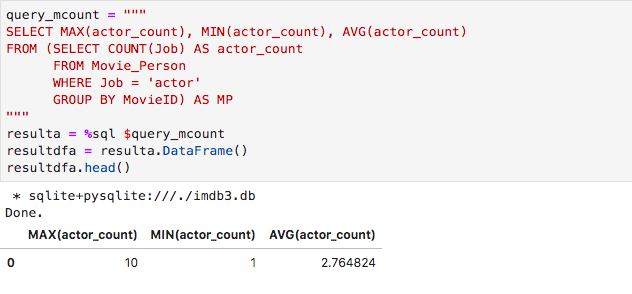

In [33]:
Image("figures/p2_s5.png", width="600")

The second step was to create a small query to compute the maximum, minimum, and average number of jobs that are actresses for each movie. I will also use these computations to set up a range to limit bias in my result. The structure of the outer query and subquery follows the same logic as the previous query.


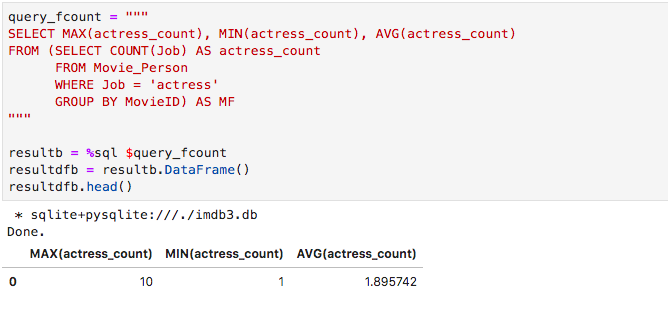

In [34]:
Image("figures/p2_s6.png", width="600")

The third step was to create a query that lists out the movies and the number of jobs that are actors in each movie. The field for `MovieID` and count of `Job` is from the `Movie_Person` table, the WHERE clause filters the `Job` field to only include `actor`, the GROUP BY clause partitions the count of actor jobs based on each movie. I used the HAVING clause to filter the rows from the aggregation of the partitioned values. Lastly, the results are ordered by the number of jobs per movie to keep the result organized. The resulting data frame only has movies that have 1 to 3 jobs that are actors, due to the computation in the previous query. This is because the average number of jobs as an actor in each movie is around 3, and the average number of jobs as an actress in each movie is around 2. Thus, it is best to select values with the most occurrence and include both actors and actresses counts. 


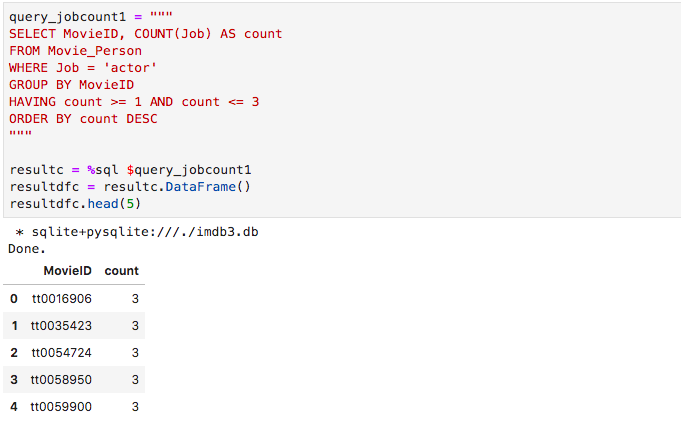

In [35]:
Image("figures/p2_s7.png", width="600")

The fourth step was to create a query that counts the number of jobs that are actresses in each movie. The structure of the query follows the same logic as the query for actors in step 3.


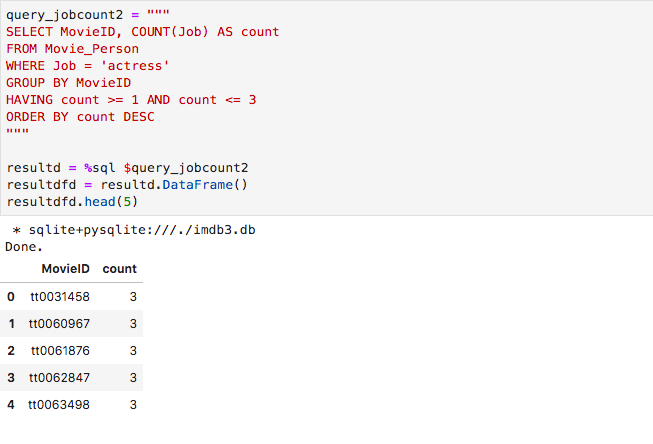

In [36]:
Image("figures/p2_s8.png", width="600")

The fifth step was to create a query that incorporates the previous query. This query counts the number of jobs that are actors for each movie genre. The subquery is the query from step three, which allows the query to select movies that have 1 to 3 actor positions. And from the selected movies, the outer query can group the movies to their assigned genres so that each movie genre has movies that have 1 to 3 actor positions. This computation must be done by combining the `Movie_Person` table, the `Movies` table, the `Movie_Genre` table, and the `Genres` table together. Because there is not a field in the `Genres` table that counts the number of job positions for each movie and genre. Also, the values of actors are character data, thus computation of the count of actor jobs if necessary and must be nested within this query. To combine the tables, first I combined the `Movie_Person` table with the `Movies` table with left join and used the `MovieID` field as the matching condition. Then I combined the `Movies` table with the `Movie_Genres` table with left join and used the `MovieID` field as the matching condition. Lastly, I combined the `Movie_Genres` table with the `Genres` table with a left join and used the `GenreID` field as the matching condition. After joining the tables, I used the GROUP BY method in order to partition the count of actors for each movie based on genre. Lastly, I ordered the results by count in ascending order to keep the table organized.


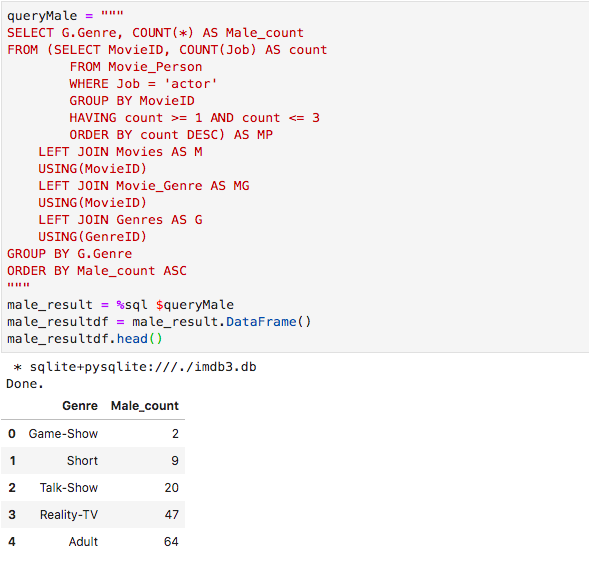

In [37]:
Image("figures/p2_s9.png", width="600")

The sixth step was to create a query that incorporates the query from step four. This query counts the number of jobs that are actresses for each movie genre. The structure and logic of this query are the same as the previous query from step five.


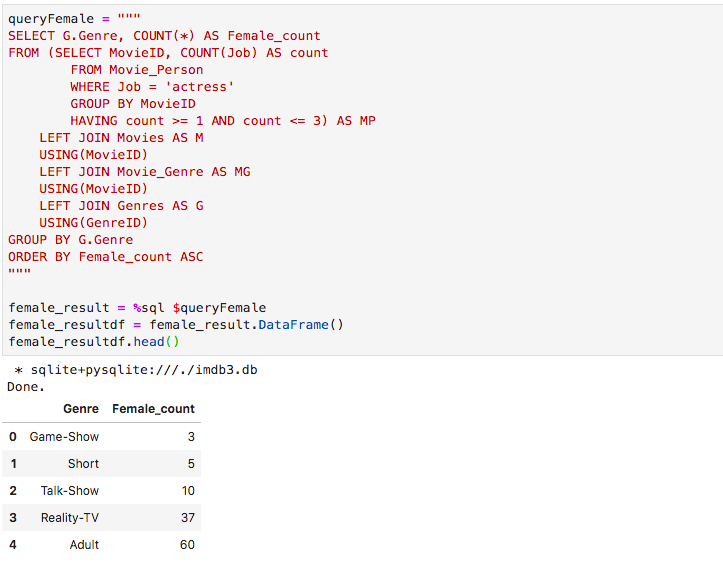

In [38]:
Image("figures/p2_s10.png", width="600")

The last step was to write a function that creates a query that joins the queries from steps five and six. The query for the count of jobs that are actors for each movie genre is combined with the query that counts the number of jobs that are actresses for each movie genre with INNER JOIN operation on the `Genres` field as the matching condition. I decided to make separate queries, one for actors and the other for actresses, then combine the two together, because it would be easier to manage and would be more logical to follow through. I used an INNER JOIN operation because I need all the rows from both tables to make the resulting data frame. Lastly, I used the ORDER BY method to order the values by the count of actors then by actresses to keep the data frame organized.


After creating the query, I incorporated the variable values to the function with SQL variable binding. The statement object is created to specify that the variables to be bound are located in query_q3. The second step was the creation of the bound statement with bindparams(). The parameters in this function are j1, c1_min, c1_max, j2, c2_min, and c2_max. Lastly, the query was executed to obtain the resulting panda data frame. The functional dependency for this table is: Genre -> count1, count2. This data frame allowed me to create a key visual that compares the count for actors and actresses in each movie genre.


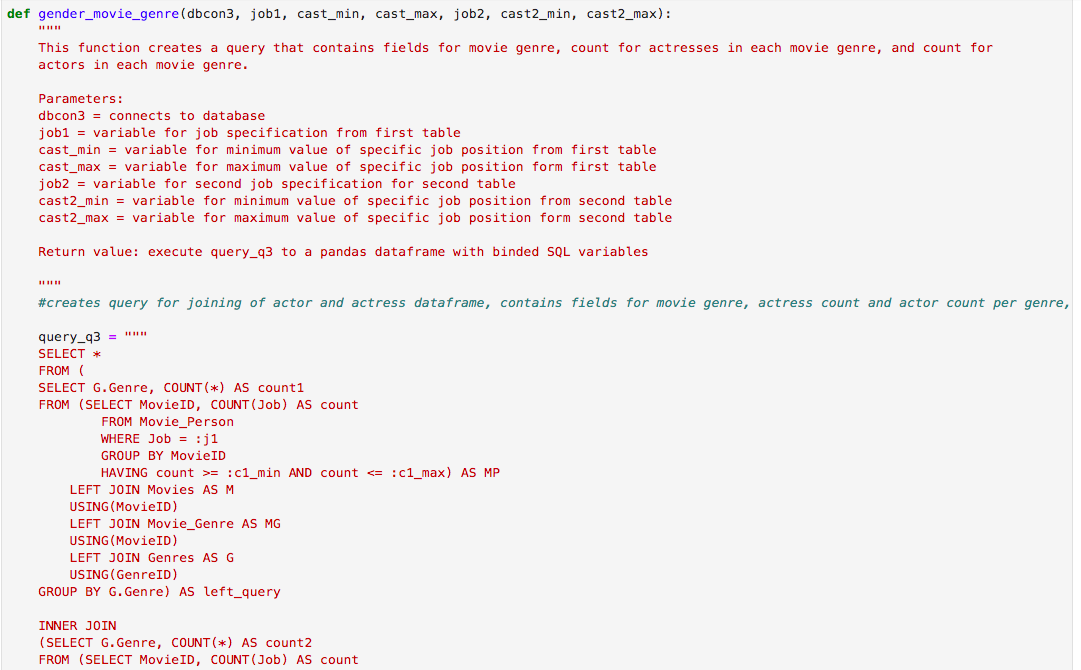

In [39]:
Image("figures/p2_s11.png", width="600")

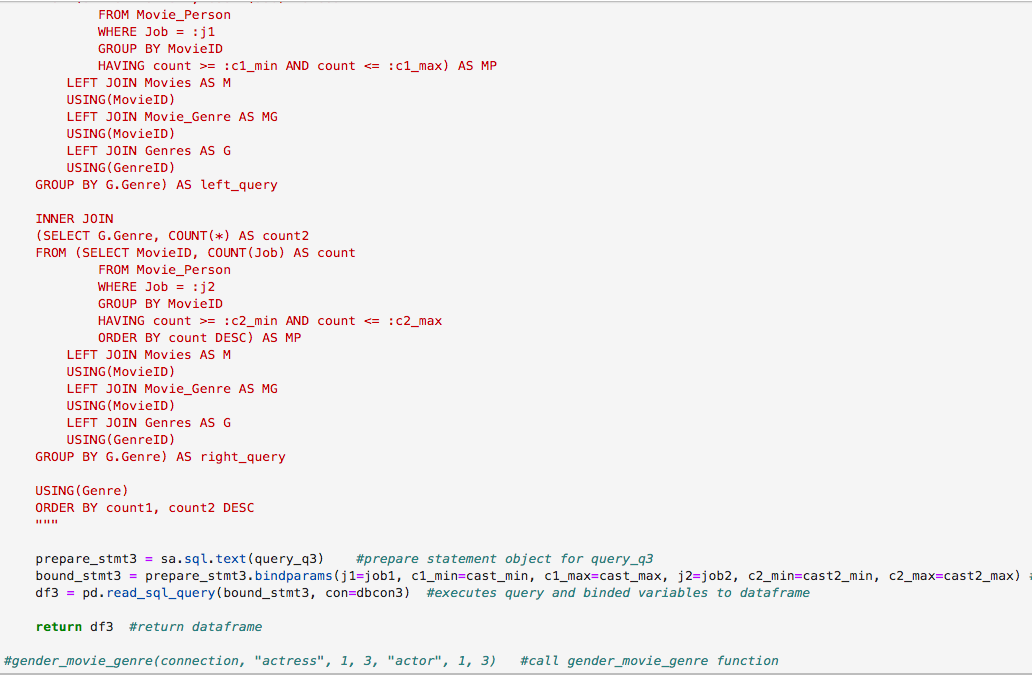

In [40]:
Image("figures/p2_s12.png", width="600")

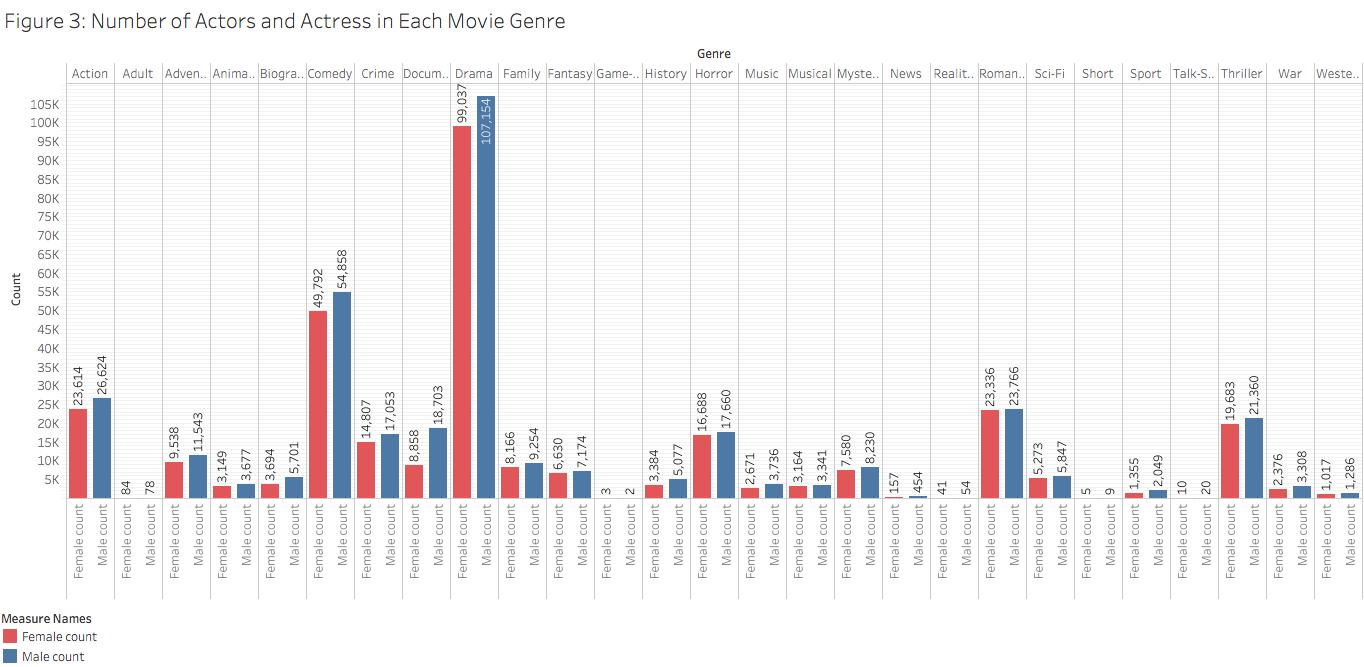

In [13]:
Image("figures/Question3_figure_final.jpg", height="900", width="1000")

In Figure 3, I created a grouped bar graph that shows the number of actors and actresses in each movie genre and compares the number of actors and actresses in each genre. The bar graph shows that Drama genre movies have the highest number of actors and actresses, and Game-show genre movies have the lowest number of actors and actresses. From a broad perspective, in almost every movie genre, there are more actors than actresses. 


The number of actors and actresses for each movie can be interpreted as there are more cast members for movie genres that are most popular. Whichever movie genre is popular has more movies produced in that genre, and more actors and actresses are needed to be in those movies. However, there are other factors that may influence the number of casts for movies. The comparison between the number of actors and actresses can be interpreted as there is a gender gap in the film industry, and that certain genres have specific gender roles. However, more evidence is needed to support this hypothesis.


# IV. End of Proccessing:

After the functions that make the queries are called, the export_to_csv() function exports all of the resulting pandas data frame to csv files.


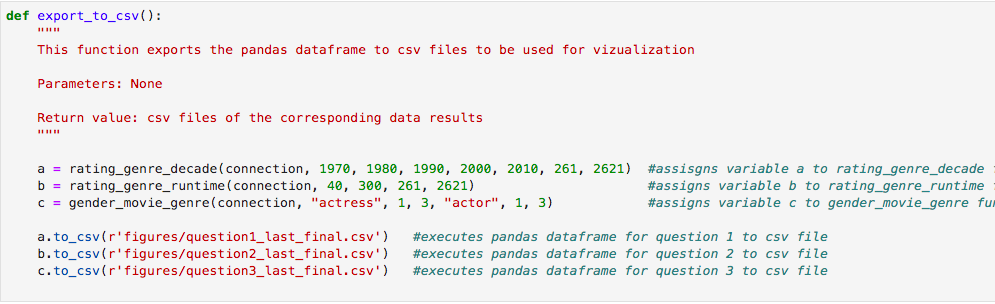

In [41]:
Image("figures/p2_s13_p2.png", width="600")

The main() function calls all the functions and controls the overall processing.


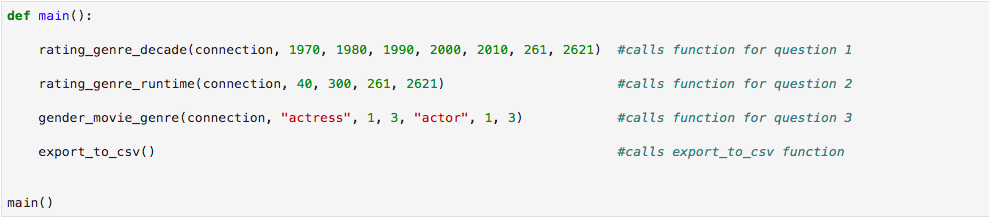

In [42]:
Image("figures/p2_s14.png", width="600")

Finally, the connection to the SQL server is closed because I finished using the connection. The engine is deleted for proper cleanup because the connection to a provider consumes local resources and remote resources.


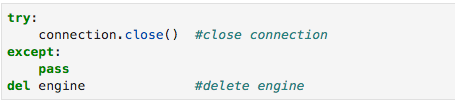

In [43]:
Image("figures/p2_s15.png", width="600")

# V. Conclusion:

In conclusion, from question 1, the genres that had the highest average rating for all the decade years are History and Documentary. The lowest average ratings for all decade years are Sci-Fi and Horror. The majority of movie genres had a decrease in average rating as the years passed. From question 2, I found that the movie runtime and the average rating of movies have a weak and positive correlation. And the genre of the movies does not have a significant impact on the relation between movie length and its average rating. Lastly, from question3, there was a striking difference between the number of casts for each movie genre and a stark contrast present between actor and actress positions from each movie genre. Overall, the dataset is complex and interesting, and further in-depth analysis of the variables and its relations with each other is encouraged.
